In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from pathlib import Path
import tqdm
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail
import requests
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from adjustText import adjust_text
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import time
from PIL import Image
from collections import defaultdict

In [2]:
from nba_api.stats.endpoints.playbyplayv2 import PlayByPlayV2

from nba_api.stats.endpoints.playbyplay import PlayByPlay
from nba_api.stats.endpoints.leaguegamefinder import LeagueGameFinder
from nba_api.stats.static.players import find_players_by_full_name
from nba_api.stats.static.teams import find_teams_by_full_name
from nba_api.stats.endpoints.playergamelogs import PlayerGameLogs
from nba_api.stats.endpoints.boxscoretraditionalv2 import BoxScoreTraditionalV2
from nba_api.stats.endpoints.shotchartdetail import ShotChartDetail

from nba_api.stats.endpoints.leaguedashteamshotlocations import LeagueDashTeamShotLocations
from nba_api.stats.endpoints.leaguedashplayerptshot import LeagueDashPlayerPtShot

from nba_api.stats.endpoints.synergyplaytypes import SynergyPlayTypes
from nba_api.stats.endpoints.leaguedashptstats import LeagueDashPtStats
from nba_api.stats.endpoints.leaguedashplayerstats import LeagueDashPlayerStats

from nba_api.stats.endpoints.leaguehustlestatsplayer import LeagueHustleStatsPlayer

In [3]:
season = '2021-22'

In [4]:
player_stats_all = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame').get_data_frames()[0]

In [5]:
role_players = player_stats_all.loc[(player_stats_all.MIN >= 10) & (player_stats_all.MIN <= 23) & (player_stats_all.GP > 30)]

In [6]:
player_stats = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Home').get_data_frames()[0]

In [7]:
role_home = player_stats.loc[player_stats.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]

In [8]:
player_stats_away = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Road').get_data_frames()[0]

In [9]:
role_away = player_stats_away.loc[player_stats_away.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]

In [10]:
interesting_home = role_home.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

In [11]:
interesting_away = role_away.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

In [12]:
merged_data = pd.merge(left=interesting_home, right=interesting_away, on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION'], suffixes=('_HOME', '_AWAY'))

In [13]:
merged_data.loc[:, 'FG3_PCT_HOME'] = merged_data.FG3_PCT_HOME * 100
merged_data.loc[:, 'FG3_PCT_AWAY'] = merged_data.FG3_PCT_AWAY * 100

In [14]:
plt.style.use('fivethirtyeight')

In [15]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

def getImage(path, zoom=1.0):
    #print(path)
    return OffsetImage(plt.imread(path), zoom=zoom)

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.patches import Rectangle
from matplotlib.ticker import FormatStrFormatter


import matplotlib.ticker as mtick

zoom = 0.65
team_root_dir = '../../team_logos_id/'
player_root_dir = 'player_imgs/'

def get_player_img(player_id, should_download=False, zoom=zoom):
    path = Path(f'player_imgs/{player_id}.png').absolute()
    if path.exists():
        return
    if should_download:
        url = f"https://cdn.nba.com/headshots/nba/latest/260x190/{player_id}.png"
        response = requests.get(url)
        img = plt.imread(BytesIO(response.content))
        with open(f'player_imgs/{player_id}.png', 'wb') as f:
            f.write(response.content)
    else:
        img = plt.imread(f'{player_root_dir}{player_id}.png')
    #print(path)
    return OffsetImage(img, zoom=zoom)

def get_team_img(team_id):
    #print(path)
    return OffsetImage(plt.imread(f'{team_root_dir}{team_id}.png'), zoom=zoom)

In [16]:
season = '2021-22'

In [17]:
player_stats_all = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame').get_data_frames()[0]

role_players = player_stats_all.loc[(player_stats_all.MIN >= 10) & (player_stats_all.MIN <= 23) & (player_stats_all.GP > 30)]


In [18]:
player_stats = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Home').get_data_frames()[0]

role_home = player_stats.loc[player_stats.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]



In [19]:
player_stats_away = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Road').get_data_frames()[0]

role_away = player_stats_away.loc[player_stats_away.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]


In [20]:


interesting_home = role_home.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

interesting_away = role_away.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

merged_data = pd.merge(left=interesting_home, right=interesting_away, on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION'], suffixes=('_HOME', '_AWAY'))

merged_data.loc[:, 'FG3_PCT_HOME'] = merged_data.FG3_PCT_HOME * 100
merged_data.loc[:, 'FG3_PCT_AWAY'] = merged_data.FG3_PCT_AWAY * 100

In [21]:
merged_data = merged_data.loc[(merged_data.FG3A_HOME * merged_data.GP_HOME + merged_data.FG3A_AWAY + merged_data.GP_AWAY >= 100)]

In [25]:
merged_data


PLAYER_ID         PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP_HOME  \
3      1630197  Aleksej Pokusevski  1610612760               OKC       33   
5      1630578      Alperen Sengun  1610612745               HOU       34   
6      1629599         Amir Coffey  1610612746               LAC       32   
10     1629717       Armoni Brooks  1610612761               TOR       23   
11      203085       Austin Rivers  1610612743               DEN       34   
..         ...                 ...         ...               ...      ...   
180    1629660           Ty Jerome  1610612760               OKC       22   
181    1626145          Tyus Jones  1610612763               MEM       36   
182     201961     Wayne Ellington  1610612747               LAL       20   
183     202083     Wesley Matthews  1610612749               MIL       25   
188    1630533     Ziaire Williams  1610612763               MEM       29   

     MIN_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  GP_AWAY  MIN_AWAY  \
3        20.2        1.1        3.3          32.7       28      20.3   
5        20.5        0.4        1.8          23.0       38      20.8   
6        20.1        1.3        3.0          41.2       37      25.0   
10       16.6        1.3        4.7          28.4       31      14.9   
11       21.0        0.8        2.9          27.0       33      23.2   
..        ...        ...        ...           ...      ...       ...   
180      15.7        1.2        3.9          31.8       26      17.5   
181      21.5        1.1        2.9          39.8       37      20.9   
182      18.0        2.0        4.7          41.9       23      19.6   
183      20.3        0.9        3.1          28.2       24      20.6   
188      21.5        1.2        3.8          30.9       33      21.9   

     FG3M_AWAY  FG3A_AWAY  FG3_PCT_AWAY  
3          0.8        3.1          24.1  
5          0.4        1.5          26.8  
6          1.5        4.2          35.7  
10         1.4        4.5          30.7  
11         1.6        4.0          39.7  
..         ...        ...           ...  
180        1.0        3.9          26.7  
181        1.1        2.8          38.2  
182        1.9        5.1          36.4  
183        1.3        3.3          39.2  
188        1.3        4.0          31.8  

[65 rows x 14 columns]

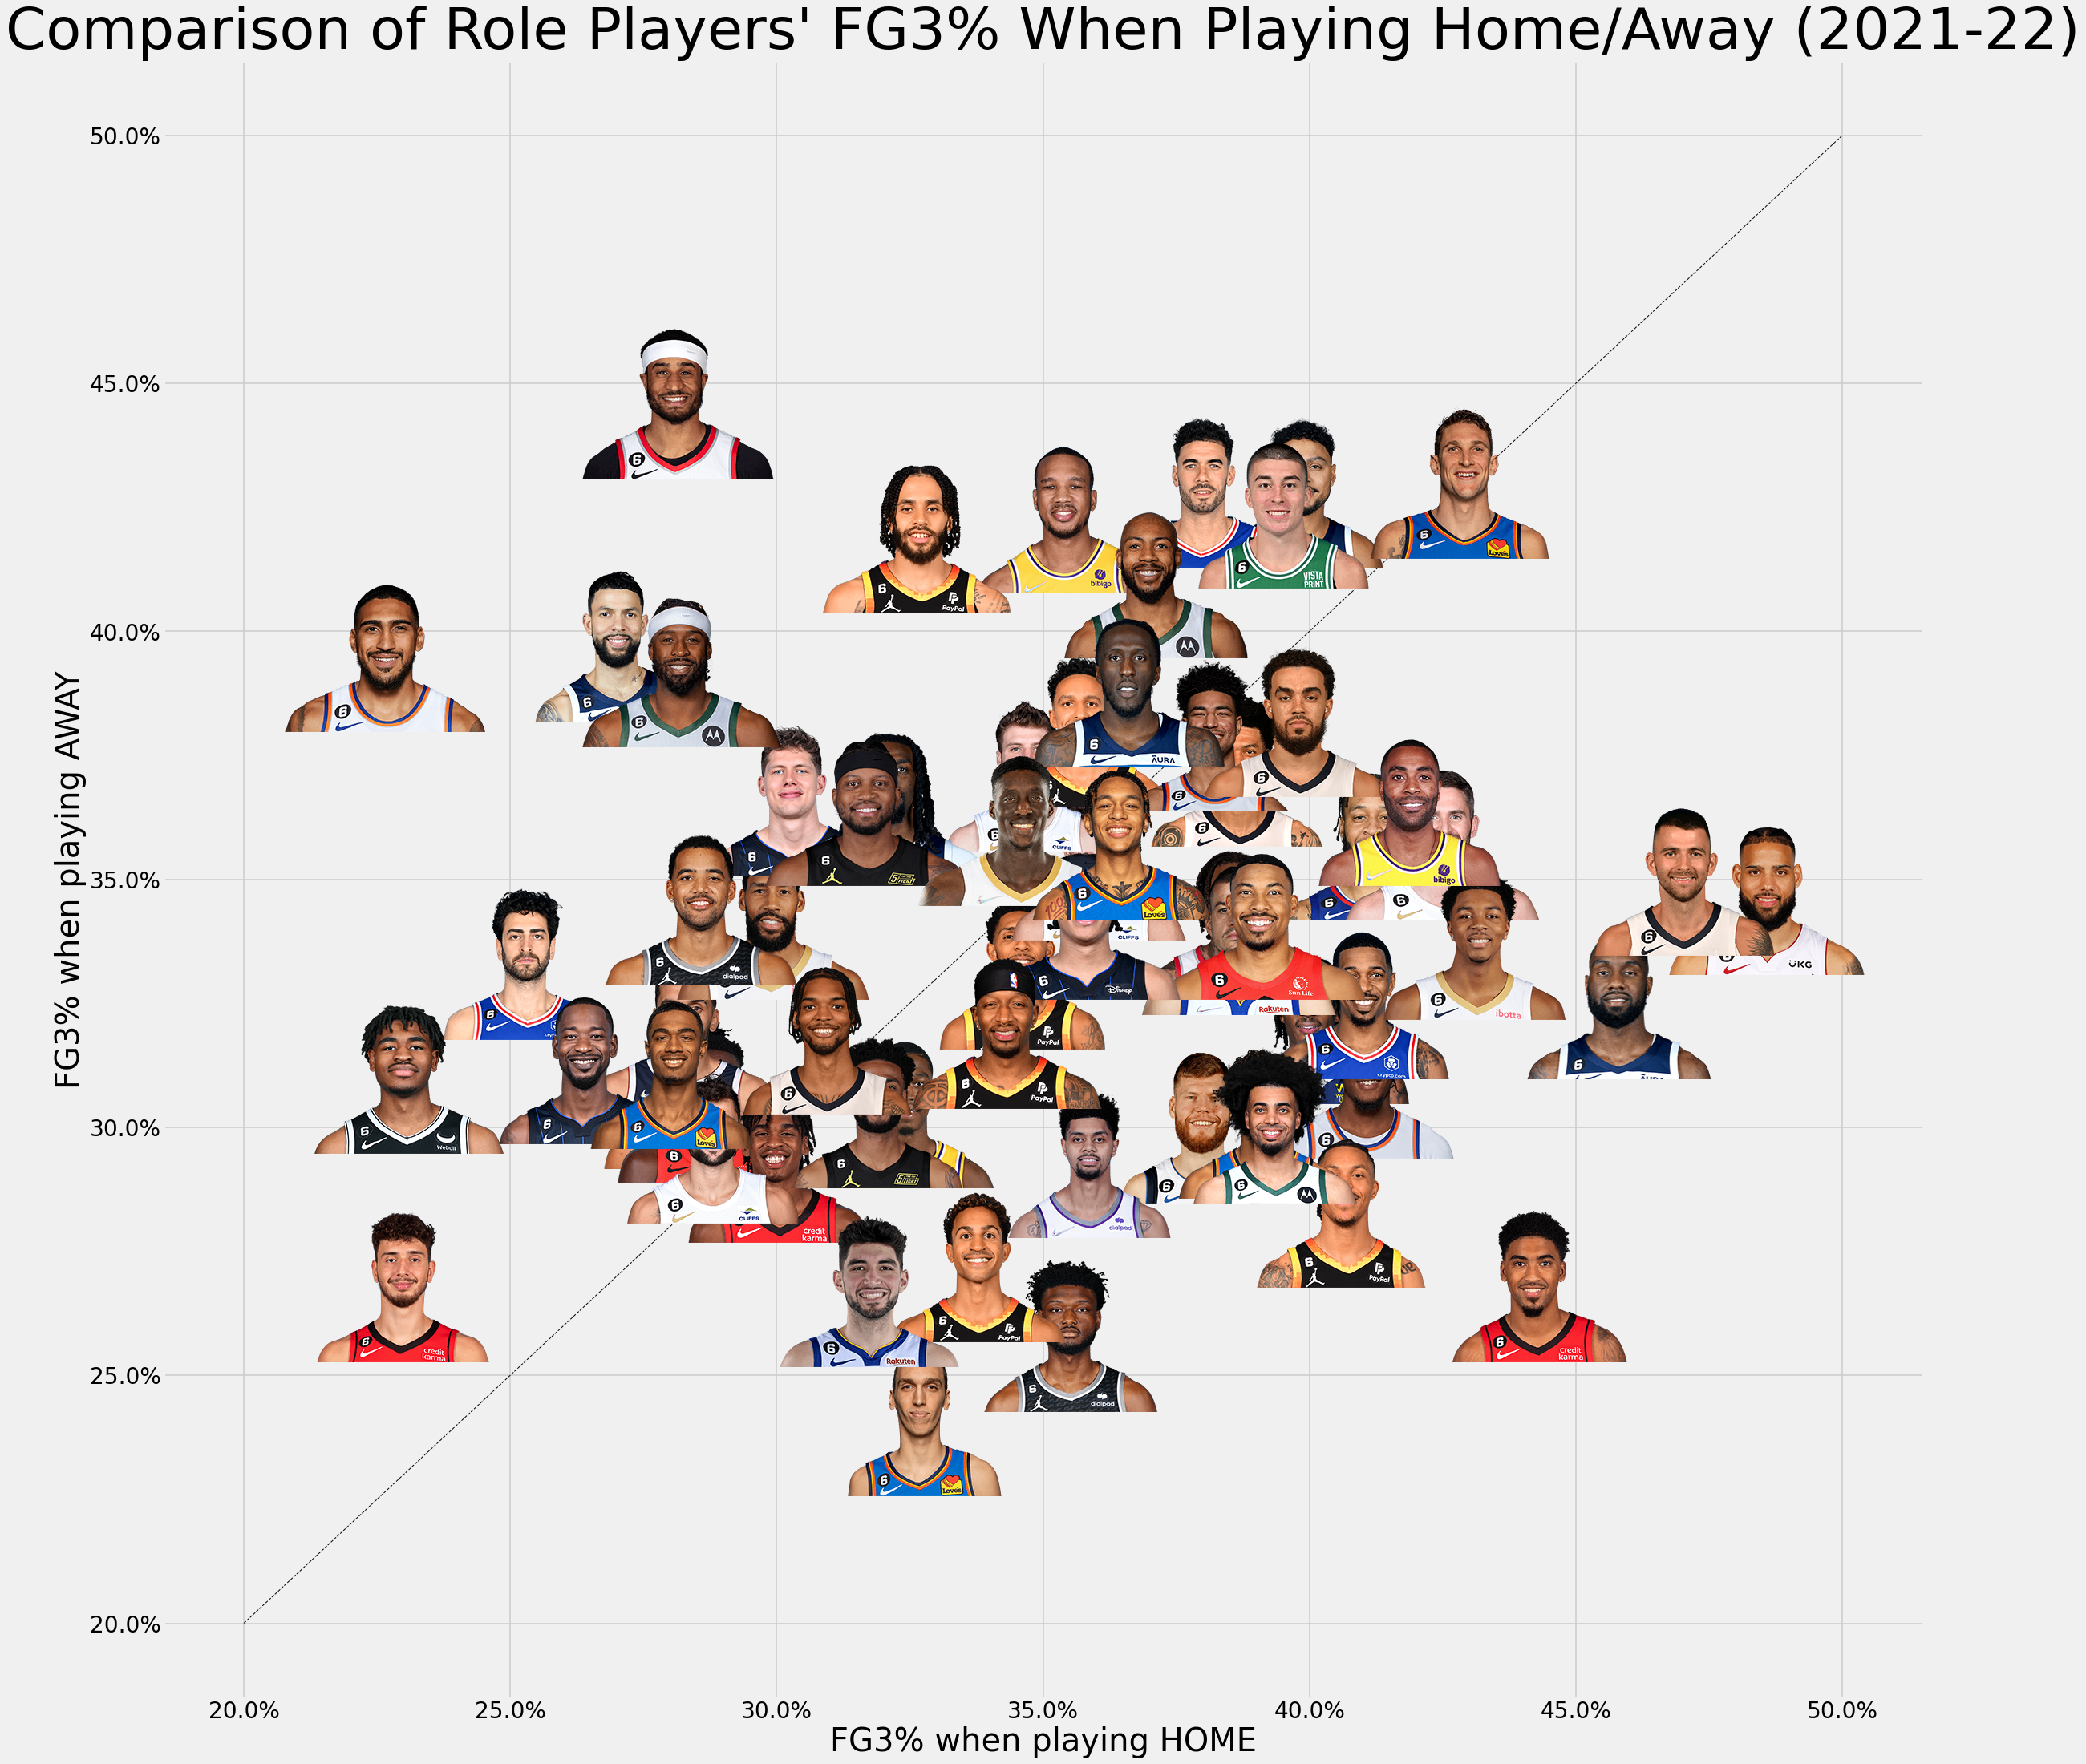

In [22]:
fig, ax = plt.subplots(figsize=(35, 35))

x=merged_data.FG3_PCT_HOME
y=merged_data.FG3_PCT_AWAY
ax.scatter(x=x, y=y, s=100)

paths = []
for i in range(len(merged_data)):
    item = merged_data.iloc[i]
    get_player_img(player_id=item.PLAYER_ID, should_download=True)
    paths.append(f'player_imgs/{item.PLAYER_ID}.png')

for x0, y0, path in zip(x.tolist(), y.tolist(), paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

ax.plot(list(range(20, 51, 1)), list(range(20, 51, 1)), color='black', ls='--', lw=1)

ax.tick_params(labelsize=28)
ax.set_xlabel("FG3% when playing HOME", size=40)
ax.set_ylabel("FG3% when playing AWAY", size=40)
ax.set_title("Comparison of Role Players' FG3% When Playing Home/Away (2021-22)", size=72)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#ax.set_xlim([0, 51])
#ax.set_ylim([0, 51])
ax.grid(True, lw=1.5)

## Current season

In [26]:
season = '2022-23'


In [27]:

player_stats_all = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame').get_data_frames()[0]

role_players = player_stats_all.loc[(player_stats_all.MIN >= 10) & (player_stats_all.MIN <= 23) & (player_stats_all.GP > 10)]


In [28]:

player_stats = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Home').get_data_frames()[0]

role_home = player_stats.loc[player_stats.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]


In [29]:

player_stats_away = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Road').get_data_frames()[0]

role_away = player_stats_away.loc[player_stats_away.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]



In [30]:

interesting_home = role_home.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

interesting_away = role_away.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

merged_data = pd.merge(left=interesting_home, right=interesting_away, on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION'], suffixes=('_HOME', '_AWAY'))

merged_data.loc[:, 'FG3_PCT_HOME'] = merged_data.FG3_PCT_HOME * 100
merged_data.loc[:, 'FG3_PCT_AWAY'] = merged_data.FG3_PCT_AWAY * 100

merged_data = merged_data.loc[(merged_data.FG3A_HOME * merged_data.GP_HOME + merged_data.FG3A_AWAY + merged_data.GP_AWAY >= 50)]

In [31]:
merged_data

PLAYER_ID         PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP_HOME  \
0      1631100          AJ Griffin  1610612737               ATL       17   
2      1630598       Aaron Wiggins  1610612760               OKC       18   
4       202692          Alec Burks  1610612765               DET       15   
5      1630197  Aleksej Pokusevski  1610612760               OKC       17   
8      1630237        Anthony Lamb  1610612744               GSW       18   
..         ...                 ...         ...               ...      ...   
166    1630177        Theo Maledon  1610612766               CHA       16   
168    1630544            Tre Mann  1610612760               OKC       20   
171    1626168          Trey Lyles  1610612758               SAC       18   
178     202083     Wesley Matthews  1610612749               MIL       15   
179     203115         Will Barton  1610612764               WAS       15   

     MIN_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  GP_AWAY  MIN_AWAY  \
0        23.3        1.7        5.1          33.7       22      18.8   
2        19.3        0.8        2.1          37.8       16      16.2   
4        21.6        1.8        4.0          45.0       19      21.9   
5        22.7        1.2        3.5          33.9       14      20.8   
8        20.3        1.5        3.9          38.0       17      19.3   
..        ...        ...        ...           ...      ...       ...   
166      15.8        0.6        1.9          32.3       19      16.3   
168      21.6        1.8        5.0          36.0       19      17.7   
171      16.9        1.6        3.8          40.6       18      13.8   
178      13.8        0.7        2.5          28.9       11      16.3   
179      20.8        1.4        3.5          40.4       21      19.7   

     FG3M_AWAY  FG3A_AWAY  FG3_PCT_AWAY  
0          1.5        3.7          40.7  
2          0.6        1.3          45.0  
4          2.2        4.7          45.6  
5          1.3        3.0          42.9  
8          1.4        3.0          45.1  
..         ...        ...           ...  
166        0.5        1.6          32.3  
168        0.9        4.0          23.7  
171        0.7        2.4          30.2  
178        0.7        2.1          34.8  
179        1.2        3.5          33.8  

[74 rows x 14 columns]

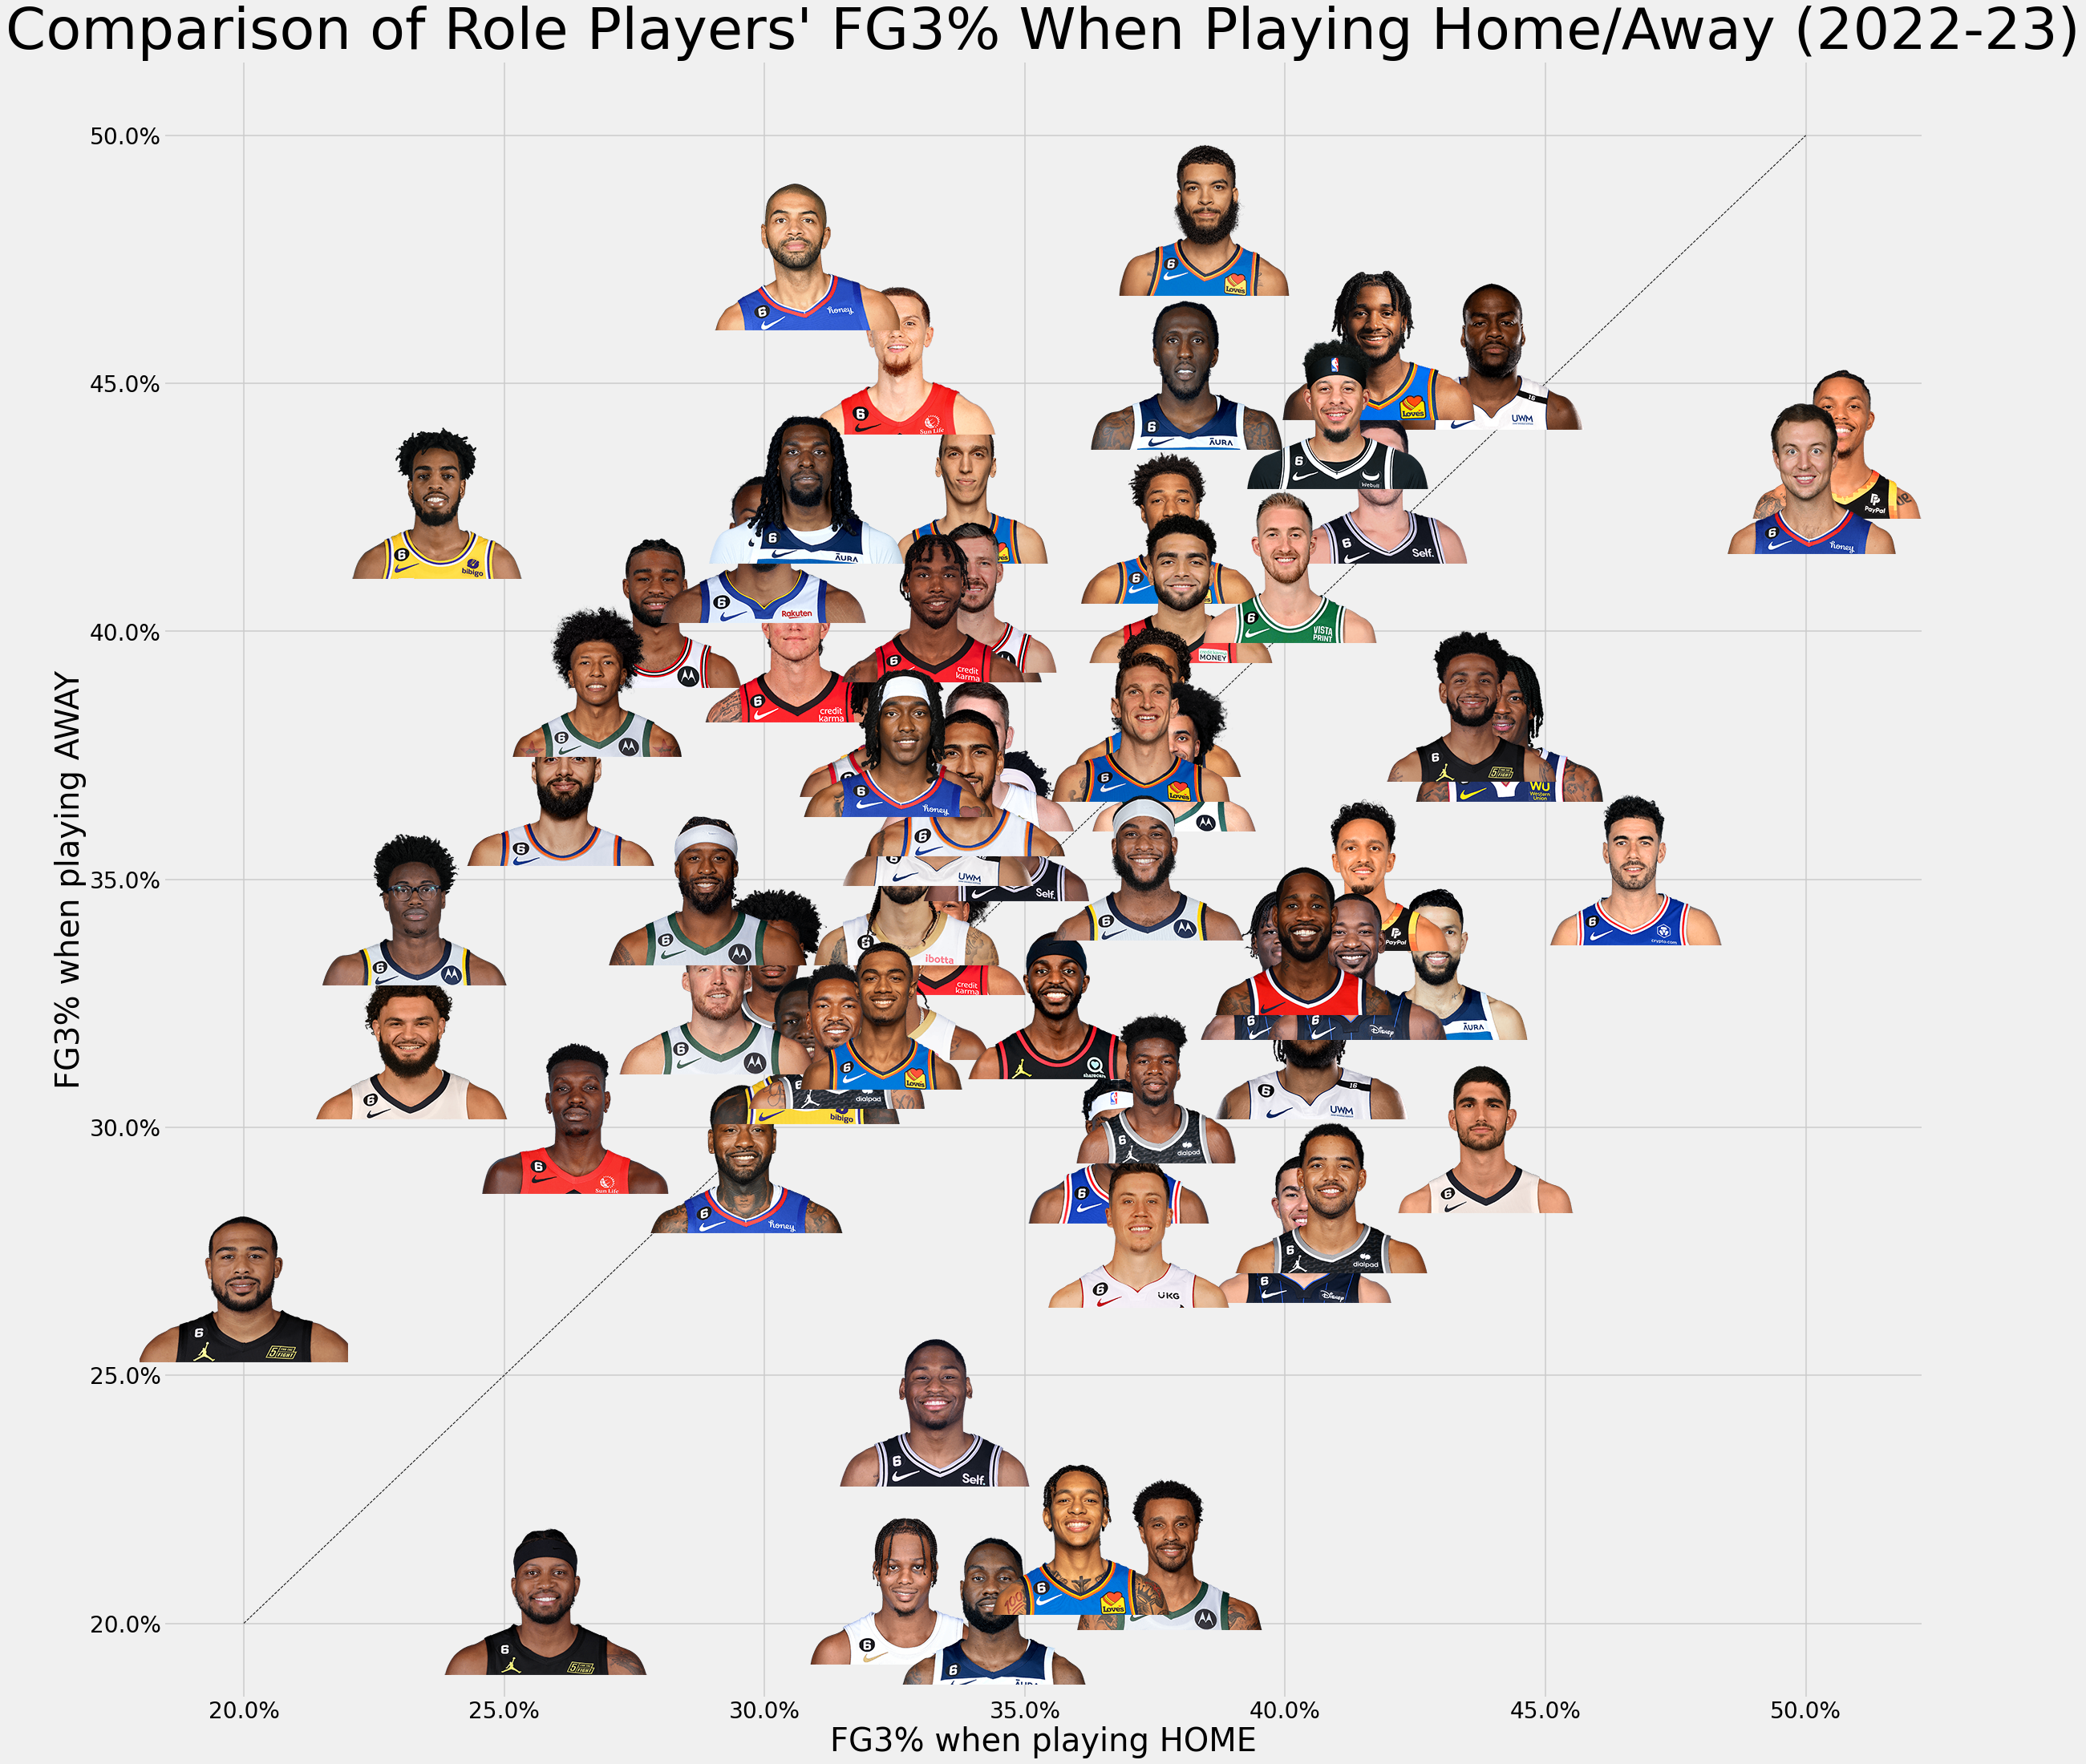

In [154]:
fig, ax = plt.subplots(figsize=(35, 35))

x=merged_data.FG3_PCT_HOME
y=merged_data.FG3_PCT_AWAY
ax.scatter(x=x, y=y, s=100)

paths = []
for i in range(len(merged_data)):
    item = merged_data.iloc[i]
    get_player_img(player_id=item.PLAYER_ID, should_download=True)
    paths.append(f'player_imgs/{item.PLAYER_ID}.png')

for x0, y0, path in zip(x.tolist(), y.tolist(), paths):
    ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
    ax.add_artist(ab)

ax.plot(list(range(20, 51, 1)), list(range(20, 51, 1)), color='black', ls='--', lw=1)

ax.tick_params(labelsize=28)
ax.set_xlabel("FG3% when playing HOME", size=40)
ax.set_ylabel("FG3% when playing AWAY", size=40)
ax.set_title(f"Comparison of Role Players' FG3% When Playing Home/Away ({season})", size=72)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#ax.set_xlim([0, 51])
#ax.set_ylim([0, 51])
ax.grid(True, lw=1.5)

## Aggregating per team

In [156]:
season = '2022-23'


In [157]:

player_stats_all = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame').get_data_frames()[0]

role_players = player_stats_all.loc[(player_stats_all.MIN >= 10) & (player_stats_all.MIN <= 23) & (player_stats_all.GP > 10)]


In [158]:

player_stats = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Home').get_data_frames()[0]

role_home = player_stats.loc[player_stats.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]


In [159]:

player_stats_away = LeagueDashPlayerStats(season=season, per_mode_detailed='PerGame', location_nullable='Road').get_data_frames()[0]

role_away = player_stats_away.loc[player_stats_away.PLAYER_ID.isin(role_players.PLAYER_ID.tolist())]



In [160]:
interesting_home = role_home.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

interesting_away = role_away.loc[:, ['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'GP', 'MIN', 'FG3M', 'FG3A', 'FG3_PCT']]

merged_data = pd.merge(left=interesting_home, right=interesting_away, on=['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION'], suffixes=('_HOME', '_AWAY'))

merged_data.loc[:, 'FG3_PCT_HOME'] = merged_data.FG3_PCT_HOME * 100
merged_data.loc[:, 'FG3_PCT_AWAY'] = merged_data.FG3_PCT_AWAY * 100

In [161]:
merged_data

PLAYER_ID        PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP_HOME  \
0      1631100         AJ Griffin  1610612737               ATL       17   
1      1628988      Aaron Holiday  1610612737               ATL       18   
2      1630598      Aaron Wiggins  1610612760               OKC       18   
3      1629678  Admiral Schofield  1610612753               ORL       14   
4       202692         Alec Burks  1610612765               DET       13   
..         ...                ...         ...               ...      ...   
180    1630214     Xavier Tillman  1610612763               MEM       15   
181    1629139      Yuta Watanabe  1610612751               BKN        9   
182    1628380       Zach Collins  1610612759               SAS       17   
183    1630192         Zeke Nnaji  1610612743               DEN       17   
184    1630533    Ziaire Williams  1610612763               MEM        8   

     MIN_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  GP_AWAY  MIN_AWAY  \
0        23.3        1.7        5.1          33.7       20      18.8   
1        15.0        0.7        1.4          48.0       19      17.4   
2        19.3        0.8        2.1          37.8       14      16.8   
3        13.1        0.6        1.8          32.0       11      13.6   
4        21.8        1.7        3.8          44.0       19      21.9   
..        ...        ...        ...           ...      ...       ...   
180      12.2        0.1        0.3          20.0       10      10.9   
181      19.3        1.6        2.4          63.6       18      17.8   
182      21.5        0.5        1.8          25.8       14      19.8   
183      12.0        0.2        0.8          23.1       14      10.5   
184      20.3        0.6        3.6          17.2        7      13.7   

     FG3M_AWAY  FG3A_AWAY  FG3_PCT_AWAY  
0          1.5        3.7          40.5  
1          0.6        1.7          37.5  
2          0.6        1.4          42.1  
3          0.9        2.6          34.5  
4          2.2        4.7          45.6  
..         ...        ...           ...  
180        0.2        0.5          40.0  
181        1.4        2.9          48.1  
182        0.8        1.5          52.4  
183        0.1        0.6          11.1  
184        0.9        2.0          42.9  

[185 rows x 14 columns]

In [162]:
per_team_data = merged_data.groupby(['TEAM_ABBREVIATION', 'TEAM_ID']).agg(
{
    'FG3M_HOME': 'sum',
    'FG3A_HOME': 'sum',
    'FG3M_AWAY': 'sum',
    'FG3A_AWAY': 'sum'
}).reset_index()

In [163]:
merged_data.loc[merged_data.TEAM_ABBREVIATION == 'DAL']

PLAYER_ID      PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  GP_HOME  \
38     202722    Davis Bertans  1610612742               DAL       11   
49     203939    Dwight Powell  1610612742               DAL       22   
54    1628373  Frank Ntilikina  1610612742               DAL       10   
72    1630702      Jaden Hardy  1610612742               DAL        9   
94    1630182       Josh Green  1610612742               DAL       14   

    MIN_HOME  FG3M_HOME  FG3A_HOME  FG3_PCT_HOME  GP_AWAY  MIN_AWAY  \
38       9.2        1.0        2.6          37.9       12      11.2   
49      17.5        0.0        0.1           0.0       15      17.2   
54      12.4        0.4        1.7          23.5       13      13.1   
72       7.9        0.6        1.3          41.7        6      14.4   
94      21.4        1.3        2.3          56.3       11      18.9   

    FG3M_AWAY  FG3A_AWAY  FG3_PCT_AWAY  
38        1.2        3.5          33.3  
49        0.0        0.0           0.0  
54        0.3        1.6          19.0  
72        0.3        2.7          12.5  
94        0.5        2.0          27.3

In [134]:
per_team_data.loc[:, 'FG3_PCT_HOME'] = per_team_data.FG3M_HOME / per_team_data.FG3A_HOME * 100
per_team_data.loc[:, 'FG3_PCT_AWAY'] = per_team_data.FG3M_AWAY / per_team_data.FG3A_AWAY * 100

In [135]:
per_team_data

TEAM_ABBREVIATION     TEAM_ID  FG3M_HOME  FG3A_HOME  FG3M_AWAY  FG3A_AWAY  \
0                ATL  1610612737        4.0       11.7        3.6       10.1   
1                BKN  1610612751        7.4       16.5        6.6       16.3   
2                BOS  1610612738        2.0        5.1        2.3        5.9   
3                CHA  1610612766        1.7        6.3        2.1        7.1   
4                CHI  1610612741        3.0        8.7        3.9       10.5   
5                CLE  1610612739        3.3       10.1        3.2        9.8   
6                DAL  1610612742        3.3        8.0        2.3        9.8   
7                DEN  1610612743        4.7       11.1        4.0       11.2   
8                DET  1610612765        5.4       14.8        6.9       18.1   
9                GSW  1610612744        3.6       11.3        4.6       12.3   
10               HOU  1610612745        2.5        9.3        3.7       10.6   
11               IND  1610612754        2.3        9.2        3.6       10.6   
12               LAC  1610612746        6.1       17.2        6.6       17.3   
13               LAL  1610612747        3.5       10.4        3.9       10.1   
14               MEM  1610612763        3.7       13.4        4.7       12.7   
15               MIA  1610612748        3.9       11.3        2.9       12.2   
16               MIL  1610612749        7.2       21.4        7.5       23.7   
17               MIN  1610612750        5.8       16.8        4.8       14.9   
18               NOP  1610612740        3.7       11.2        3.3       10.8   
19               NYK  1610612752        4.6       14.9        5.8       17.8   
20               OKC  1610612760       11.5       31.5       11.6       32.6   
21               ORL  1610612753        7.0       18.8        5.5       16.9   
22               PHI  1610612755        4.3       10.7        3.7       10.7   
23               PHX  1610612756        6.8       18.8        8.1       21.3   
24               POR  1610612757        2.5        6.9        3.1        8.7   
25               SAC  1610612758        5.4       15.9        4.9       15.5   
26               SAS  1610612759        8.5       24.4        8.0       21.5   
27               TOR  1610612761        2.8       11.7        4.6       13.9   
28               UTA  1610612762        2.6        9.0        3.4       10.4   
29               WAS  1610612764        2.6        7.3        2.4        7.4   

    FG3_PCT_HOME  FG3_PCT_AWAY  
0      34.188034     35.643564  
1      44.848485     40.490798  
2      39.215686     38.983051  
3      26.984127     29.577465  
4      34.482759     37.142857  
5      32.673267     32.653061  
6      41.250000     23.469388  
7      42.342342     35.714286  
8      36.486486     38.121547  
9      31.858407     37.398374  
10     26.881720     34.905660  
11     25.000000     33.962264  
12     35.465116     38.150289  
13     33.653846     38.613861  
14     27.611940     37.007874  
15     34.513274     23.770492  
16     33.644860     31.645570  
17     34.523810     32.214765  
18     33.035714     30.555556  
19     30.872483     32.584270  
20     36.507937     35.582822  
21     37.234043     32.544379  
22     40.186916     34.579439  
23     36.170213     38.028169  
24     36.231884     35.632184  
25     33.962264     31.612903  
26     34.836066     37.209302  
27     23.931624     33.093525  
28     28.888889     32.692308  
29     35.616438     32.432432

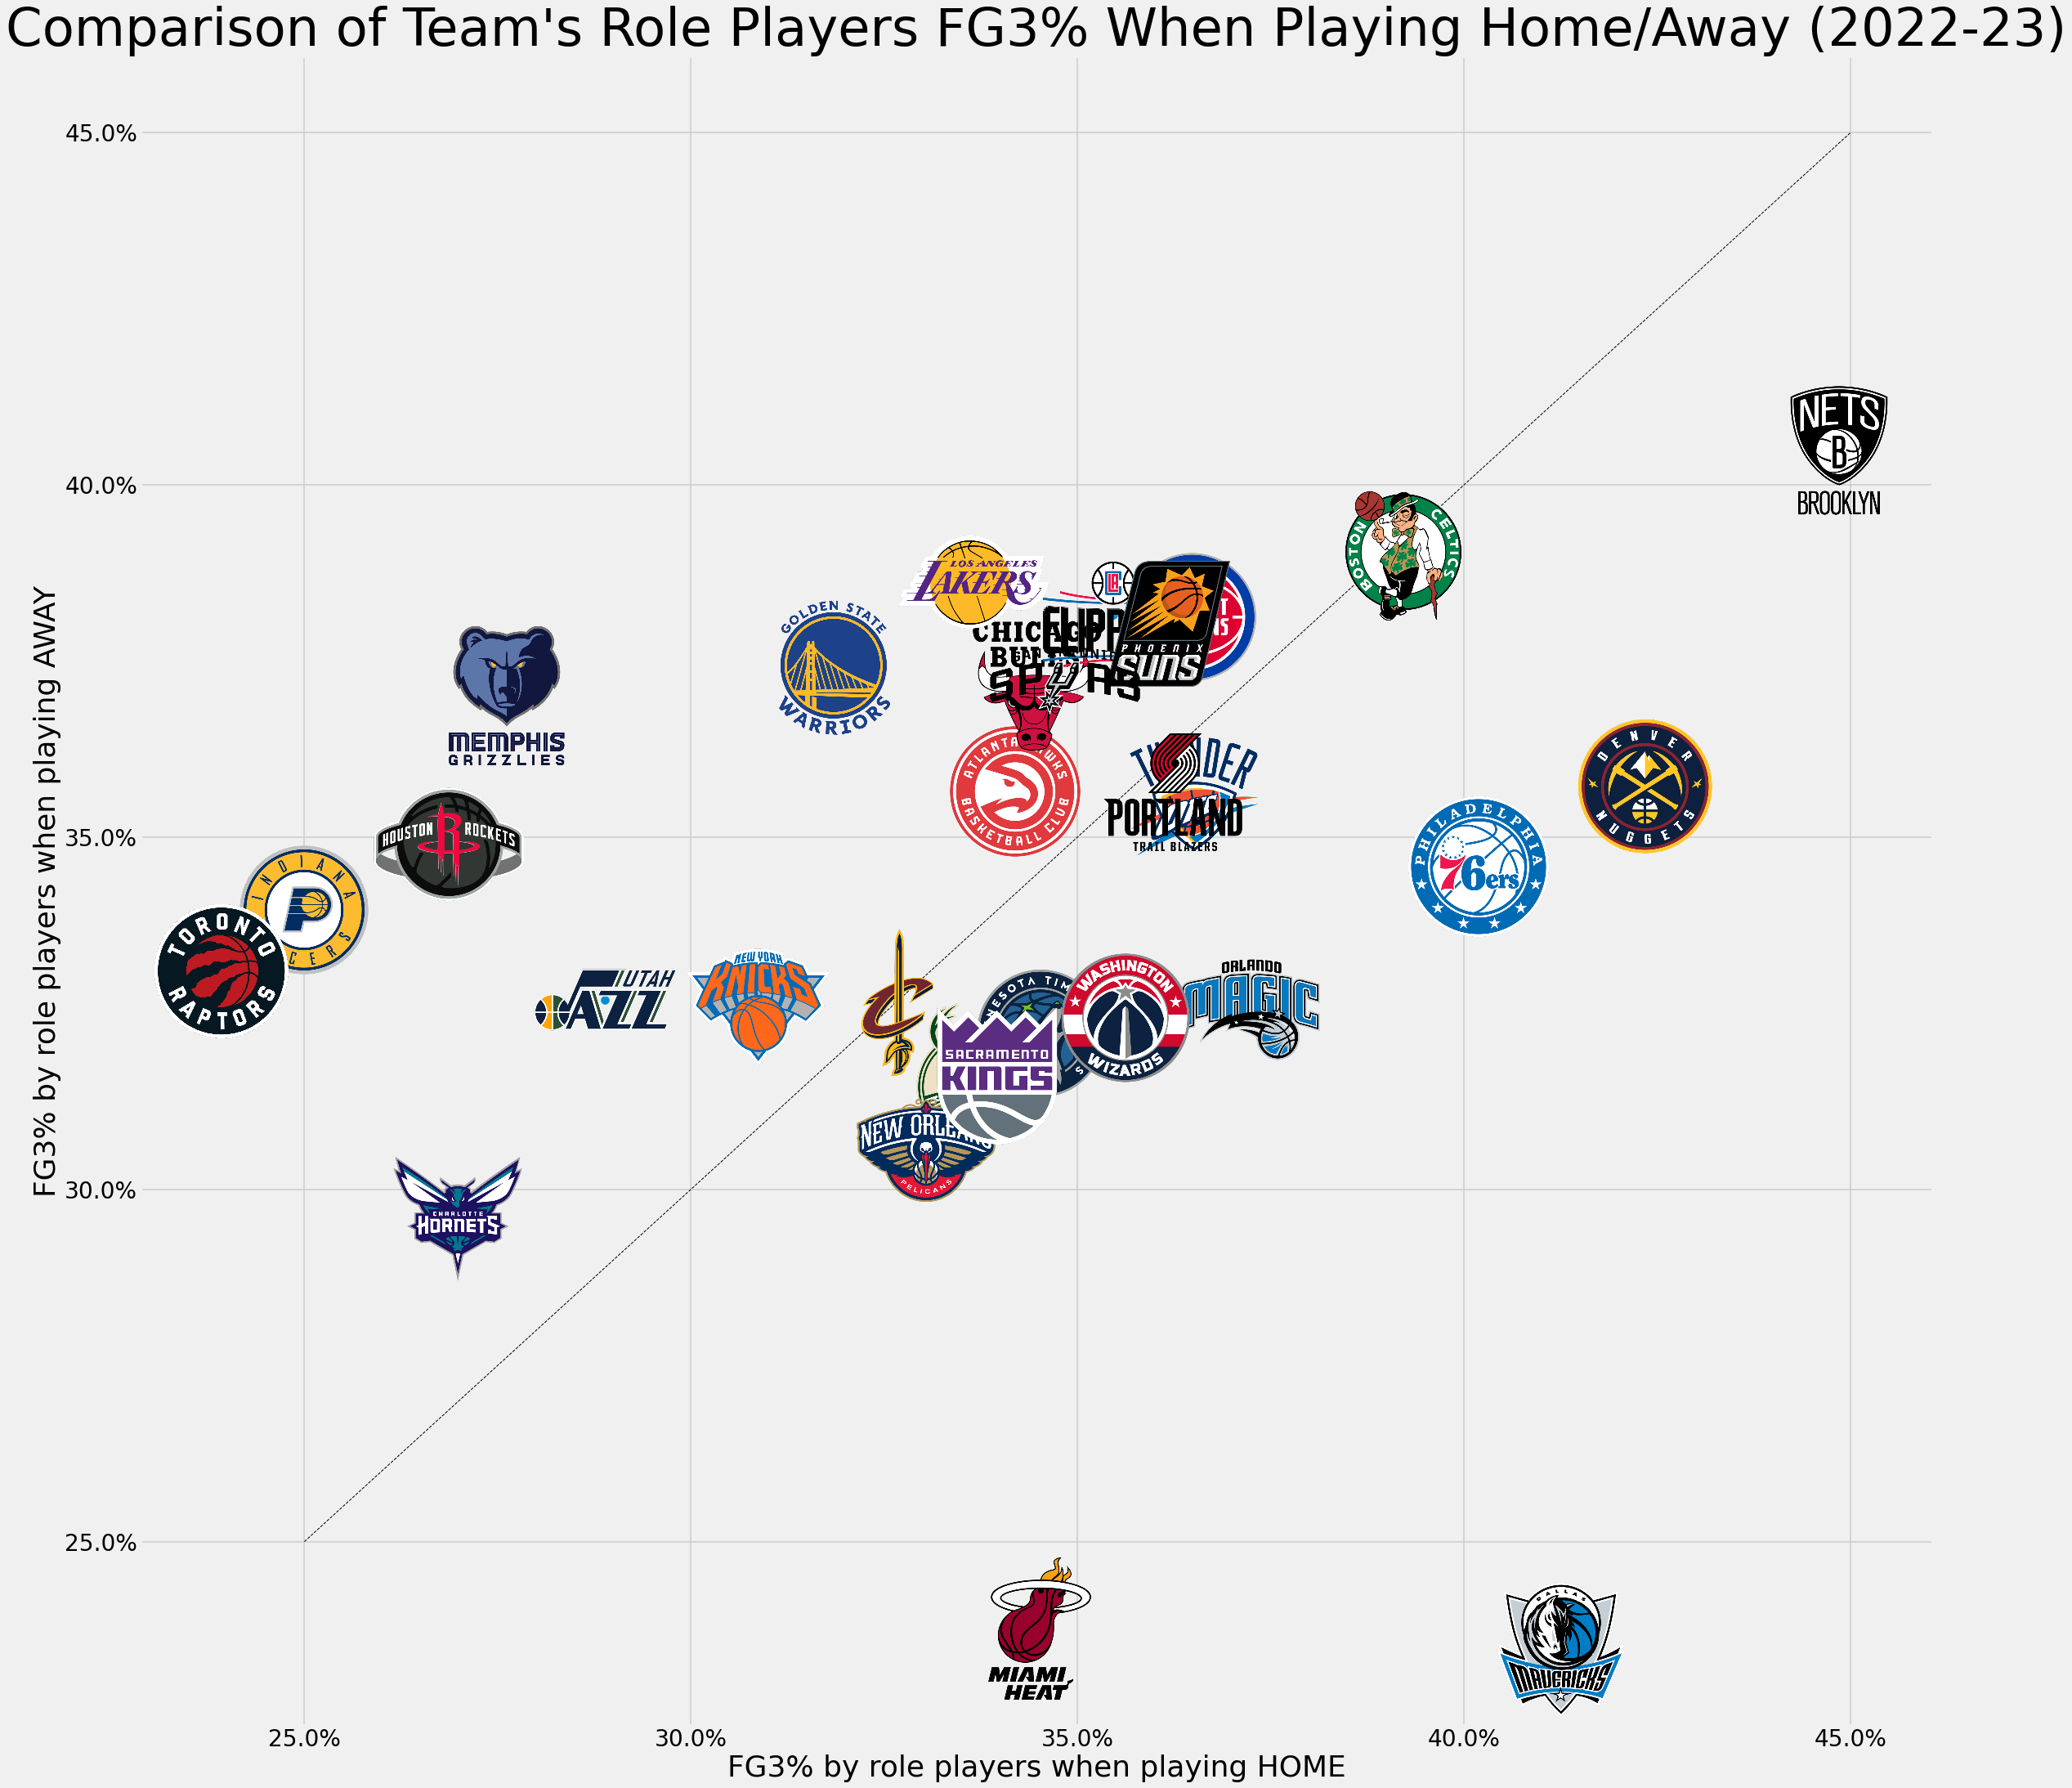

In [141]:
fig, ax = plt.subplots(figsize=(35, 35))

x=per_team_data.FG3_PCT_HOME
y=per_team_data.FG3_PCT_AWAY
ax.scatter(x=x, y=y, s=100)

paths = []
for i in range(len(per_team_data)):
    item = per_team_data.iloc[i]
    paths.append(f'../../team_logos_id/{item.TEAM_ID}.png')

for x0, y0, path in zip(x.tolist(), y.tolist(), paths):
    ab = AnnotationBbox(getImage(path, zoom=0.25), (x0, y0), frameon=False)
    ax.add_artist(ab)

ax.plot(list(range(25, 46, 1)), list(range(25, 46, 1)), color='black', ls='--', lw=1)

ax.tick_params(labelsize=28)
ax.set_xlabel("FG3% by role players when playing HOME", size=36)
ax.set_ylabel("FG3% by role players when playing AWAY", size=36)
ax.set_title(f"Comparison of Team's Role Players FG3% When Playing Home/Away ({season})", size=64)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

#ax.set_xlim([0, 51])
#ax.set_ylim([0, 51])
ax.grid(True, lw=1.5)